In [117]:
import spacy
import pandas as pd

data = pd.read_csv('nytimes.csv', sep=',')
data = data.drop(columns=['Unnamed: 0'])
data

/Users/imamabdullah/Desktop/Bocconi/MSc/Innovation and Marketing Analytics


,links,articles,date
0,https://www.nytimes.com/2022/03/01/us/politics...,Russia-Ukraine War Advertisement The president...,2022/03/01
1,https://www.nytimes.com/2023/10/16/us/politics...,Israel-Hamas War Advertisement Supported by A ...,2023/10/16
2,https://www.nytimes.com/2023/10/17/us/politics...,Israel-Hamas War Advertisement Supported by Th...,2023/10/17
3,https://www.nytimes.com/2023/10/17/style/israe...,Israel-Hamas War Advertisement Supported by Fa...,2023/10/17
4,https://www.nytimes.com/2023/10/18/briefing/ga...,Israel-Hamas War Advertisement Newsletter The ...,2023/10/18
...,...,...,...
1550,https://www.nytimes.com/2024/04/23/world/europ...,Russia-Ukraine War Advertisement Supported by...,2024/04/23
1551,https://www.nytimes.com/2024/04/23/opinion/pro...,Advertisement Supported by Mara Gay By Mara G...,2024/04/23
1552,https://www.nytimes.com/2024/04/23/world/middl...,Israel-Hamas War Advertisement Supported by T...,2024/04/23
1553,https://www.nytimes.com/article/how-the-times-...,Israel-Hamas War Advertisement We have been w...,article/ho


In [118]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def clean_text(text):
    '''reduce text to lower-case lexicon entry'''
    lemmas = [token.lemma_ for token in nlp(text)
              if token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'}]
    return ' '.join(lemmas)

data['clean_text'] = data['articles'].apply(clean_text)
data['clean_text']

0       Russia Ukraine War Advertisement president mak...
1       Israel Hamas War Advertisement support preside...
2       Israel Hamas War Advertisement support explosi...
3       Israel Hamas War Advertisement support fashion...
4       Israel Hamas War Advertisement Newsletter pres...
                              ...                        
1550    Russia Ukraine War Advertisement support overw...
1551    advertisement support Mara Gay Mara Gay Ms. Ga...
1552    Israel Hamas War Advertisement support United ...
1553    Israel Hamas War Advertisement work journalist...
1554    Israel Hamas War surprise attack Hamas put Isr...
Name: clean_text, Length: 1555, dtype: object

In [120]:
import nltk
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/imamabdullah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/imamabdullah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [121]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder

sid = SentimentIntensityAnalyzer()

sentiments = []
for description in data['clean_text']:
    sentiment_scores = sid.polarity_scores(description)
     
    sentiment = 'pos' if sentiment_scores['compound'] > 0 else 'neg'
    sentiments.append(sentiment)

data['sentiment'] = sentiments

labels2numbers = LabelEncoder()
data['sentiment#'] = labels2numbers.fit_transform(data['sentiment'].astype('str'))

sentiments = []
for description in data['clean_text']:
    sentiment_scores = sid.polarity_scores(description)
    sentiment = ''
    for key in sorted(sentiment_scores):
        sentiment += '{0}: {1}, '.format(key, sentiment_scores[key])
    sentiments.append(sentiment)

data['sentiment##'] = sentiments
print(data.head())

                                               links  \
0  https://www.nytimes.com/2022/03/01/us/politics...   
1  https://www.nytimes.com/2023/10/16/us/politics...   
2  https://www.nytimes.com/2023/10/17/us/politics...   
3  https://www.nytimes.com/2023/10/17/style/israe...   
4  https://www.nytimes.com/2023/10/18/briefing/ga...   

                                            articles        date  \
0  Russia-Ukraine War Advertisement The president...  2022/03/01   
1  Israel-Hamas War Advertisement Supported by A ...  2023/10/16   
2  Israel-Hamas War Advertisement Supported by Th...  2023/10/17   
3  Israel-Hamas War Advertisement Supported by Fa...  2023/10/17   
4  Israel-Hamas War Advertisement Newsletter The ...  2023/10/18   

                                          clean_text sentiment  sentiment#  \
0  Russia Ukraine War Advertisement president mak...       pos           1   
1  Israel Hamas War Advertisement support preside...       neg           0   
2  Israel Hamas War 

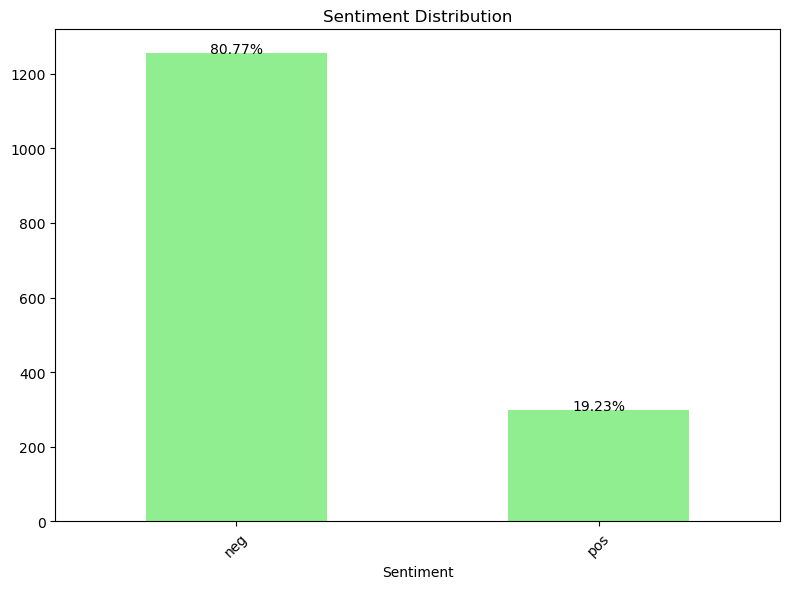

In [122]:
import matplotlib.pyplot as plt
sentiment_counts = data['sentiment'].value_counts()
total_count = sentiment_counts.sum()
percentages = (sentiment_counts / total_count) * 100

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='lightgreen')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels in percentage format for each bar
for i, count in enumerate(sentiment_counts):
    percentage = percentages[i]
    plt.text(i, count + 0.1, f'{percentage:.2f}%', ha='center')

plt.show()

In [128]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Remove rows with missing or invalid dates
data = data.dropna(subset=['date'])

In [129]:
data

,links,articles,date,clean_text,sentiment,sentiment#,sentiment##
0,https://www.nytimes.com/2022/03/01/us/politics...,Russia-Ukraine War Advertisement The president...,2022-03-01,Russia Ukraine War Advertisement president mak...,pos,1,"compound: 0.997, neg: 0.126, neu: 0.686, pos: ..."
1,https://www.nytimes.com/2023/10/16/us/politics...,Israel-Hamas War Advertisement Supported by A ...,2023-10-16,Israel Hamas War Advertisement support preside...,neg,0,"compound: -0.9981, neg: 0.174, neu: 0.712, pos..."
2,https://www.nytimes.com/2023/10/17/us/politics...,Israel-Hamas War Advertisement Supported by Th...,2023-10-17,Israel Hamas War Advertisement support explosi...,neg,0,"compound: -0.9975, neg: 0.184, neu: 0.695, pos..."
3,https://www.nytimes.com/2023/10/17/style/israe...,Israel-Hamas War Advertisement Supported by Fa...,2023-10-17,Israel Hamas War Advertisement support fashion...,pos,1,"compound: 0.7727, neg: 0.129, neu: 0.723, pos:..."
4,https://www.nytimes.com/2023/10/18/briefing/ga...,Israel-Hamas War Advertisement Newsletter The ...,2023-10-18,Israel Hamas War Advertisement Newsletter pres...,neg,0,"compound: -0.9987, neg: 0.205, neu: 0.695, pos..."
...,...,...,...,...,...,...,...
1548,https://www.nytimes.com/2024/04/22/arts/pen-am...,Israel-Hamas War Advertisement Supported by Th...,2024-04-22,Israel Hamas War Advertisement support event s...,pos,1,"compound: 0.9917, neg: 0.149, neu: 0.655, pos:..."
1549,https://www.nytimes.com/2024/04/22/podcasts/tr...,"For more audio journalism and storytelling, d...",2024-04-22,more audio journalism storytelling download Ne...,neg,0,"compound: -0.6808, neg: 0.089, neu: 0.87, pos:..."
1550,https://www.nytimes.com/2024/04/23/world/europ...,Russia-Ukraine War Advertisement Supported by...,2024-04-23,Russia Ukraine War Advertisement support overw...,pos,1,"compound: 0.5541, neg: 0.135, neu: 0.723, pos:..."
1551,https://www.nytimes.com/2024/04/23/opinion/pro...,Advertisement Supported by Mara Gay By Mara G...,2024-04-23,advertisement support Mara Gay Mara Gay Ms. Ga...,neg,0,"compound: -0.9827, neg: 0.145, neu: 0.726, pos..."


In [134]:
data_copy = data.copy()
data_copy['m/y'] = data_copy['date'].dt.strftime('%m/%Y')


In [135]:
data = data_copy

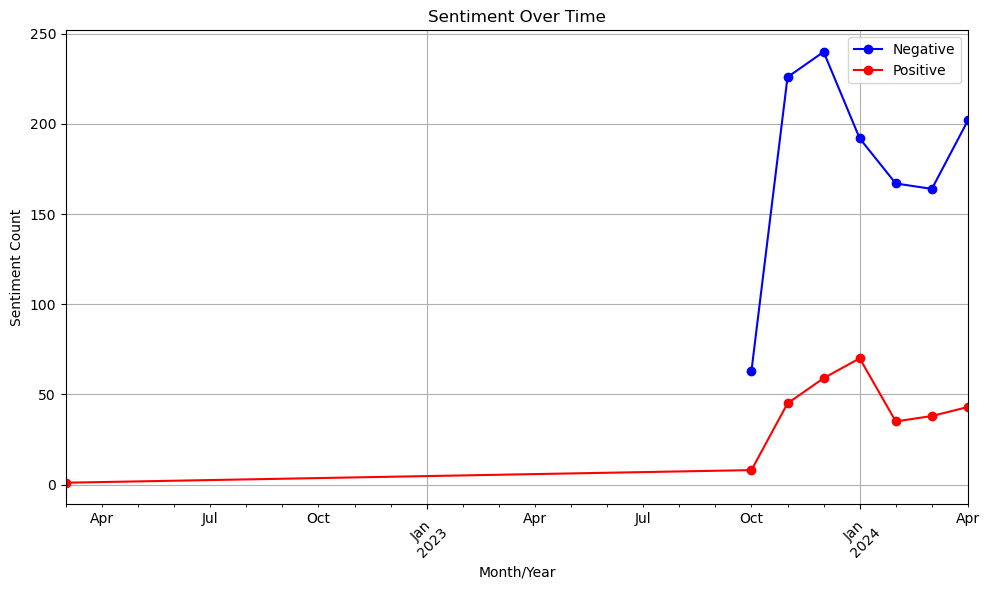

In [136]:
data['m/y'] = pd.to_datetime(data['m/y'])

# Sort data by 'm/y' in chronological order
sorted_data = data.sort_values('m/y')

# Group sorted data by 'm/y' and calculate the average sentiment for each month
monthly_sentiment_0 = sorted_data[sorted_data['sentiment#'] == 0].groupby('m/y')['sentiment#'].count()
monthly_sentiment_1 = sorted_data[sorted_data['sentiment#'] == 1].groupby('m/y')['sentiment#'].count()

# Plot the line plot
plt.figure(figsize=(10, 6))
monthly_sentiment_0.plot(kind='line', marker='o', color='b', label='Negative')
monthly_sentiment_1.plot(kind='line', marker='o', color='r', label='Positive')
plt.title('Sentiment Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

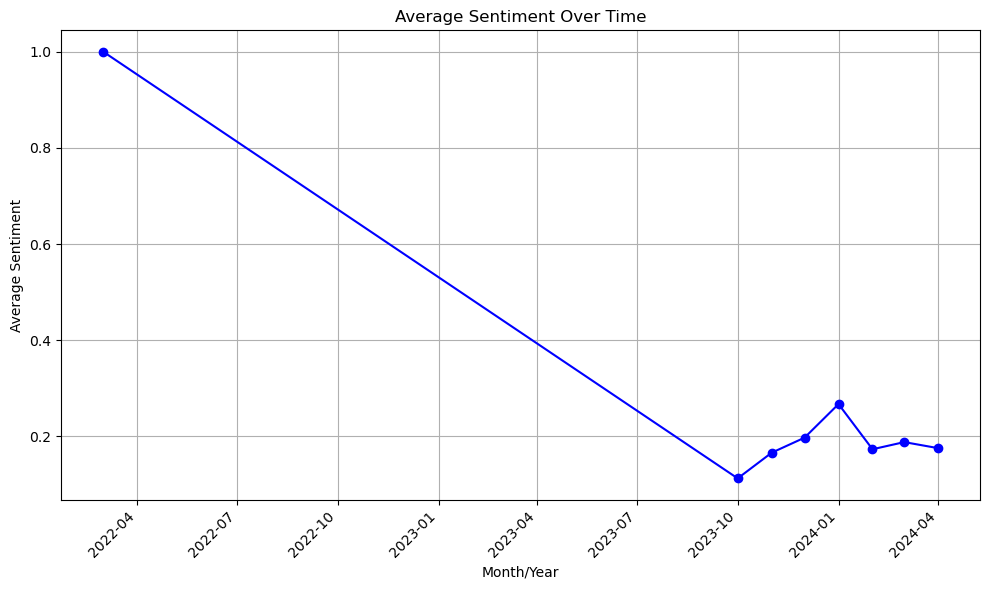

In [137]:
# Convert 'm/y' column to datetime type
data['m/y'] = pd.to_datetime(data['m/y'])

# Sort data by 'm/y' in chronological order
sorted_data = data.sort_values('m/y')

# Group sorted data by 'm/y' and calculate the average sentiment for each month
monthly_sentiment = sorted_data.groupby('m/y')['sentiment#'].mean()

# Plot the line plot
plt.figure(figsize=(10, 6))
monthly_sentiment.plot(kind='line', marker='o', color='b')
plt.title('Average Sentiment Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()